Please provide your names, last names, and student IDs.

* name 1, last name 1, student id 1  Aksenyuk Sofya, 150284 
* name 2, last name 2, student id 2  Górecki Piotr, 148282

# DECISION TREES

**Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries.**

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0.

In [29]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import common as cm

# Part 1: Information Gain

1.1 ) There are 10 objects (data) characterized with 5 binary attributes:

In [30]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [31]:
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

Hint: How one can read data (columns) in Pandas

In [32]:
print(data["cl"])
print(list(data["cl"]))
print(set(data["cl"]))
print(data["attr 1"])

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cl, dtype: int64
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
{0, 1}
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: attr 1, dtype: int64


1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

In [33]:
def getEntropy(cl):
    ### TODO
    count_1 = 0
    for i in range(len(cl)):
        if cl[i] == 1:           
            count_1 += 1
    p1 = count_1 / len(cl)
    p0 = 1 - p1
    H = -p0 * math.log(p0, 2) -p1 * math.log(p1, 2)
    return H
    ### return 0

1.4 ) Calculate the entropy for the CL vector (the result should be 0.97095....):

In [34]:
### TODO print()
print(getEntropy(data["cl"]))

0.9709505944546686


1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

In [35]:
def getConditionalEntropy(cl, attr):
    ## TODO
    count_x0_cl0 = 0
    count_x0_cl1 = 0
    count_x1_cl0 = 0
    count_x1_cl1 = 0
    list_attr = list(attr)
    list_cl = list(cl)
    for i in range(len(list_attr)):
        if (list_attr[i] == 0) and (list_cl[i] == 0):           
            count_x0_cl0 += 1
        if (list_attr[i] == 0) and (list_cl[i] == 1):
            count_x0_cl1 += 1
        if (list_attr[i] == 1) and (list_cl[i] == 0):
            count_x1_cl0 +=1
        if (list_attr[i] == 1) and (list_cl[i] == 1): 
            count_x1_cl1 += 1

    x_1 = 0
    for i in range(len(list_attr)):
        if list_attr[i] == 1:           
            x_1 += 1
    x_0 = len(list_attr) - x_1
    if x_0 == 0:
        p_x0_cl0 = 0
        p_x0_cl1 = 0
    else:
        p_x0_cl0 = count_x0_cl0 / x_0
        p_x0_cl1 = count_x0_cl1 / x_0
    if x_1 == 0:  
        p_x1_cl0 = 0
        p_x1_cl1 = 0
    else:
        p_x1_cl0 = count_x1_cl0 / x_1     
        p_x1_cl1 = count_x1_cl1 / x_1

    if p_x0_cl0 == 0:
        log_px0cl0 = 0
    else:
        log_px0cl0 = math.log(p_x0_cl0, 2)
    if p_x0_cl1 == 0:
        log_px0cl1 = 0
    else:
        log_px0cl1 = math.log(p_x0_cl1, 2)
    if p_x1_cl0 == 0:
        log_px1cl0 = 0
    else:
        log_px1cl0 = math.log(p_x1_cl0, 2)
    if p_x1_cl1 == 0:
        log_px1cl1 = 0
    else:
        log_px1cl1 = math.log(p_x1_cl1, 2)

    H_x0 = -p_x0_cl0 * log_px0cl0 - p_x0_cl1 * log_px0cl1
    H_x1 = -p_x1_cl0 * log_px1cl0 - p_x1_cl1 * log_px1cl1
    H_x = (x_0/len(list_cl)) * H_x0 + (x_1/len(list_cl)) * H_x1

    return H_x

1.6 ) Calculate conditional entropies for given attribiutes.

In [36]:
print(getConditionalEntropy(data["cl"], data["attr 1"])) ### the result should be 0.95097...
print(getConditionalEntropy(data["cl"], data["attr 5"])) ### the result should be 0.97095...

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?** Answer: The entropy for "attr 1" is lesser, because the smaller value we get - the higher level of order we have.

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [37]:
def getInformationGain(cl, attr):
    ### TODO
    gain = getEntropy(cl) - getConditionalEntropy(cl, attr)
    return gain
    ### return 0.0

In [38]:
print(getInformationGain(data["cl"], data["attr 1"]))
print(getInformationGain(data["cl"], data["attr 5"]))

0.01997309402197489
0.0


1.9) **Question: Which IG is lesser and why?** Answer: The IG for "attr 5" is lesser, because the higher value we get - the more effective that attribute in classifying training data.

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf. 

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None). 
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

**Analyze the example code**

In [39]:
class Node:
    def __init__(self, attr, left, right, value):
        self.attr = attr
        self.left = left
        self.right = right
        self.value = value

    def __call__(self, obj):
        if self.value is None:
            if obj[self.attr] == 0:
                return self.left(obj)
            else:
                return self.right(obj)
        else:
            return self.value
        
### EXAMPLE
def example(obj):
    root = Node(0, None, None, None) ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = Node(1, None, None, None) ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = Node(None, None, None, 2) ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = Node(None, None, None, 3) ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = Node(None, None, None, 4) ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    print(root(obj))
    
example([0, 0]) ### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN. 
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN. 
### IT IS A LEAF WITH THE DECISION = 3. 

example([0, 1])
example([1, 0])
example([1, 1])

3
4
2
2


2.1) Create an initial root. Set the value (decision) to 1. 

In [40]:
root = Node(None, None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [41]:
### TODO
cm.getErrorRate(root, data)                
## SHOULD BE 0.4

0.4

2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

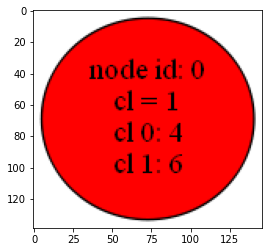

In [42]:
cm.printGraph(root, data, fileName='decision_tree_0')
plt.imshow(plt.imread("decision_tree_0.png"))

2.4) Calculate information gain for all attribiutes.

In [43]:
def printInformationGain(data):
    for attribute_name in attributeNames:
        ### TODO
        ### print()
        print(getInformationGain(data["cl"], data[attribute_name]))
printInformationGain(data)

0.01997309402197489
0.0464393446710154
0.12451124978365313
0.0912774462416801
0.0


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root. 

In [16]:
### TODO

2.6) Print the graph and calculate the error rate. What happened with the error rate?

In [17]:
### TODO

2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [18]:
left_data = data[data['attr 3']==0]
right_data = data[data['attr 3']==1]
print(left_data)
print(right_data)

   attr 1  attr 2  attr 3  attr 4  attr 5  cl
1       1       1       0       0       1   1
4       1       0       0       1       1   0
7       1       0       0       1       1   1
8       0       1       0       0       1   0
9       0       0       0       1       1   0
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
0       1       0       1       1       1   1
2       0       1       1       1       1   1
3       1       0       1       0       1   0
5       0       0       1       1       1   1
6       1       1       1       1       1   1


2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [19]:
### TODO

2.9) Choose the best attribute to split the data and then update the decision tree.

In [20]:
### TODO

2.10) Print the graph and calculate the error rate (hint: should be 0.2 :). What happened with the error rate?

In [21]:
### TODO

2.11) Split data (remember that we split left_data, not data).

In [22]:
### TODO
### leftLeft_data = 
### leftRight_data = 

2.12) Repeat the whole process for the right node.

In [23]:
# TODO compute the information gain

In [24]:
# TODO update the decision tree

In [25]:
# TODO print the decision tree and calculate the error rate (hint, should be 0.1:) )

In [26]:
# TODO split the data (right_data)
#rightLeft_data
#rightRight_data

2.13) Let's consider left-left node. Calculate information gain for it.

In [27]:
# TODO

2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

2.15) Calculate information gain for the left-right node.

In [28]:
printInformationGain(leftRight_data)

NameError: name 'leftRight_data' is not defined

In [ ]:
### Select the attribute and update the tree

In [ ]:
### Print the decision tree and compute the error rate

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

2.17) Finish creating the right side of the tree

In [ ]:
### TODO

# Part 3: automated construction of decision trees

**3.1 REMARK: the difficulty of this exercise is high**. Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

In [ ]:
max_depth = 0

def createTree(data, attributeNames, depth=0):
    data = data.reset_index().drop("index", axis=1)
    ### TODO

3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [ ]:
max_depth = 10

In [ ]:
train_attributeNames, train_data = cm.getTrainingDataSet()
### TODO - TRAINING DATASET

In [ ]:
### SEE THE EXPECTED RESULT TRAIN_TREE.PNG IN THE FILES BUNDLE. 
plt.imshow(plt.imread("train_tree_expected.png"))

In [ ]:
valid_attributesName, valid_data = cm.getValidationDataSet()
### TODO - VALIDATION DATASET

In [ ]:
### SEE THE EXPECTED RESULT TRAIN_TREE.PNG IN THE FILES BUNDLE. 
plt.imshow(plt.imread("validation_tree_expected.png"))

3.3) Consider only the training data set and answer the following questions:
* What is the miximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate. 

In [ ]:
for i in range(10):
    max_depth = i
    ### TODO